In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [96]:
# Study data files

mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

In [97]:
# Read mouse data and study results

mouse_data = pd.read_csv(mouse_metadata_path)
results_data = pd.read_csv(study_results_path)

In [98]:
# Show mouse data table

mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [99]:
# Show results data table

results_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [100]:
# Combine into single data and display table

merged_data = pd.merge(mouse_data, results_data, on="Mouse ID", how="outer")

merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [101]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint


duplicate_data = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"])]

duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [102]:
# Optional : Get all the data for the duplicate mouse ID

all_duplicated_data = merged_data[merged_data.duplicated(["Mouse ID"])]

all_duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [103]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID

cleaned_data = merged_data.drop_duplicates(["Mouse ID","Timepoint"])

cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [104]:
# Checking the number of mice in the clean DataFrame
# Looking for 249 Total Mice

cleaned_data["Mouse ID"].value_counts()

e662    10
l471    10
p189    10
g316    10
l725    10
        ..
n482     1
x226     1
o848     1
t573     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [105]:
# SUMMARY STATISTICS

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_vol_mean = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_vol_median = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_vol_variance = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_vol_sd = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_vol_sem = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

tumor_vol_stats = pd.DataFrame({"Mean": tumor_vol_mean, "Median": tumor_vol_median, "Variance": tumor_vol_variance,
                               "Standard Deviation": tumor_vol_sd, "Standard Error Of Mean": tumor_vol_sem})



In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_vol_stats



,Mean,Median,Variance,Standard Deviation,Standard Error Of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [107]:
# Using the aggregation method, produce the same summary statistics in a single line

agg_method = cleaned_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

agg_method

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [112]:
# BAR AND PIE CHARTS

# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas. DataFrame.plot()

# Create a data frame that represents the count of measurements (grouped by drug regimen)
count_of_data = pd.DataFrame(cleaned_data.groupby(["Drug Regimen"]).count()).reset_index()

# Grab needed columns for bar plot and set to new variable
count_of_measurements = count_of_data[["Drug Regimen", "Mouse ID"]]

# Reset index so you can still grab Drug Regimen column but then reset it for x-axis label
count_of_measurements = count_of_measurements.set_index("Drug Regimen")


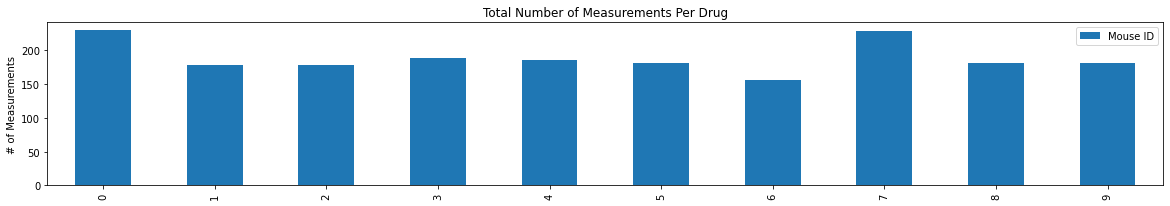

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [109]:
# Create bar plot using pandas dataframe

count_of_measurements.plot(kind="bar", figsize=(20,3))
plt.title("Total Number of Measurements Per Drug")
plt.ylabel("# of Measurements")
plt.show()
plt.tight_layout



In [118]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

count = [230, 178, 178, 188, 186, 181, 156, 228, 181, 182]
x_axis = np.arange(len(count))

drug_names = cleaned_data["Drug Regimen"].to_list()

drug_names
# plt.bar(x_axis, count, color="blue", alpha=0.5, align="center")

# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, ["drug_list"])


# # x_axis = drug_list
# # #Creating and customizing bar chart
# # plt.figure(figsize=(11,4))
# # plt.bar(x_axis, drug_count, color='b', alpha=0.5, align="center")

# # plt.title("Drug Treatment Count")
# # plt.xlabel("Drug Regimen")
# # plt.ylabel("Count")

['Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'R